In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# configuring matplotlib
plt.axes.titlesize : 24
plt.axes.labelsize : 20
plt.figsize = (15, 10)

In [4]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [5]:
raw_data = pd.read_csv('../data/raw/ISEAR.csv', header=None)
raw_data.head(15)

,0,1,2
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...
5,5,shame,When I realized that I was directing the feeli...
6,6,guilt,I feel guilty when when I realize that I consi...
7,7,joy,After my girlfriend had taken her exam we went...
8,8,fear,"When, for the first time I realized the meanin..."
9,9,anger,When a car is overtaking another and I am forc...


In [6]:
raw_data.columns = ['index', 'sentiment', 'text']
raw_data.set_index('index')
raw_data.head()

,index,sentiment,text
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...


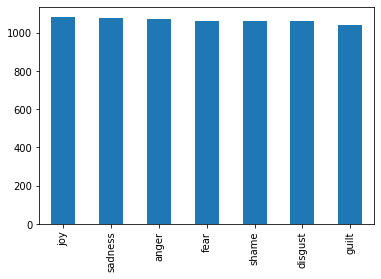

In [7]:
raw_data['sentiment'].value_counts().plot(kind='bar')

From above graph it is clear that all classes of sentiment have almost equal number of instances

In [8]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    stop_words = 'english', # removes common english words
    ngram_range = (2, 2), # extracting bigrams
    lowercase = False,
)

features = vectorizer.fit_transform(
    raw_data['text']
)


In [15]:
features_nd = features.toarray() # for easy usage
# print(features_nd.shape)
# raw_data['text_vectorized'] = list(features_nd)
# print(raw_data['text_vectorized'].shape)
# raw_data.head()

numpy.ndarray

The vectorizer will also need to be saved. Because we will need to use the same vectorizer for making new predictions

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
raw_data['sentiment_encoded'] = le.fit_transform(raw_data['sentiment'])

In [40]:
# raw_data = raw_data[['sentiment_encoded','text_vectorized']]

Save the label encoder as a pickle or in some form. Make a function that takes column names as input, converts the column, saves the label encoder and then returns the new column values.

In [22]:
# Saving the processed data
# raw_data.to_csv('../data/processed/sentiment_features.csv')

## Making the actual model

### knn model

In [19]:
# Diving data into train, validation and test set
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = features_nd, raw_data['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# X_train, X_test = list(X_train), list(y_train)

In [20]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
from sklearn.metrics import accuracy_score

predicted_results = knn.predict(X_test)

accuracy = accuracy_score(y_test, predicted_results)
accuracy

0.1865771812080537

### naive bayes'

In [22]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.35637583892617447